In [1]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it 
!test ! -e ds-assets && git clone https://github.com/lutzhamel/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/" 
import sys
sys.path.append(home)      # add home folder to module search path

Cloning into 'ds-assets'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 93 (delta 21), reused 84 (delta 14), pack-reused 0
Unpacking objects: 100% (93/93), done.


# Models of Data: Classification and Regression

We saw one model of data already -- the *Decision Tree* 

There are many more.  Here are a few more that are supported by scikit-learn:

>Support Vector Machines, kNN, Random Forests, Linear Regression


## Statistical Models vs Machine Learning

* Virtually no difference - more of a historical nomenclature given where the model came from (Statistics vs CS) than anything else

* Some of the older stats models make assumptions on the shape (distribution) of the data they work on

* To acknowledge that there is a confluence of Stats and Machine Learning we often talk about *Statistical Learning*

* Here we talk about machine learning implying both statistical and computational approaches


## Machine Learning

* Machine learning involves building models using computational approaches to help understand data. 

* Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

* These models exhibit features of learning because they let us draw  inferences from specific instances (data) to the general (prediction of unseen instances)


<!-- ![swan](assets/swans.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/swans.jpg" height="270" width="480">

The [Black Swan Problem](https://en.wikipedia.org/wiki/Falsifiability) is a classic example posed by the philosopher [Karl Popper](https://en.wikipedia.org/wiki/Karl_Popper) in the early twentieth century.  It roughly states that learning/induction is always a probabilistic argument since we can only learn from a limited number of observations (D) and make generalization from those on the universe at large (X).  On a more technical level it argues this point based on *falsifiability of an hypothesis*.

## Categories of Machine Learning



### Supervised Learning

*Supervised learning* involves modeling the relationship between measured features of data and some label associated with the data,  e.g. play tennis

Once a model in this category is determined, it can be used to apply labels to new, unknown data. 

This is further subdivided into *classification* tasks and *regression* tasks: 

* classification, the labels are discrete categories, e.g. decision trees
* regression, the labels are continuous quantities, e.g. linear regression


### Unsupervised Learning


*Unsupervised learning* involves modeling the features of a dataset without reference to any label, and is often described as “letting the dataset speak for itself.” 

These models include tasks such as *clustering* and *dimensionality reduction*: 

* clustering algorithms identify distinct groups of data, e.g. k-means
* dimensionality reduction algorithms search for more succinct representations of the data, e.g. PCA


# Classification Revisited

In the previous notebook we have seen a visualization of a decision tree model.
The model was a shallow model of the iris data set,

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/tree-model.png" height="120" width="260">

which we visualized as the piecewise linear model,

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/tree-viz.png" height="240" width="400">

In general, classification problems involving two labels or classes are depticted using a **linear decision surface**.  The following is a typical scenario.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/classification2.jpg" height="300" width="600">


## The Perceptron

The [perceptron](https://en.wikipedia.org/wiki/Perceptron) is a single neuron neural network that constructs a linear decision surface.  The learned parameters are the weights (representing the slope) and the bias term representing the 'y-offset'.



<!-- ![perceptron](assets/perceptron.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron.jpg" height="300" width="500">

The perceptron implements the following equation:

<!-- ![perceptron](assets/perceptron-eq.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-eq.jpg" height="80" width="450">

If you have taken linear algebra you will recognize the line/plane representation as a dot product.  The ${\rm sign}$ function implements the activation function of the neuron,

${\rm sign}(x) = -1 \mbox{ if } x \le 0 \mbox{ else } 1$

The symbol $\hat{f}$ denotes the neural network model.

Training a perceptron is a simple search:

<!-- ![perceptron](assets/perceptron-train.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-train.jpg"  height="250" width="280">

More precisely, this is a directed stochastic search in that the `Update` step uses the *normal vector* $\bar{w}$ of the decision surface $\bar{w} \bullet \bar{x} + b$ as a guide in order to modify $\bar{w}$ and $\bar{b}$.

## Demo - The Perceptron

Perceptron learning a decision surface.



<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-search.png"  height="400" width="500">

## Building a Perceptron

Let's build a perceptron using Sci-Kit Learn.

In [2]:
import matplotlib.pyplot as plt
import pandas
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [3]:
# prepare our data - just grab the two independent variables from the Iris dataset that mattered
# in addition to the target.
iris_df = pandas.read_csv(home+"iris.csv")
shrink_df = iris_df[['Petal.Width','Petal.Length','Species']]

# The perceptron can only deal with two labels at a 
# time so drop one of them: virginica
model_df = shrink_df[shrink_df.Species != 'virginica']

# feature matrix and target vector
model_features_df = model_df[['Petal.Length','Petal.Width']]
# neural networks can only deal with numerical target values,
# recode the labels as numerical values
f = (lambda x: 1 if x == 'setosa' else -1)
model_target_df = model_df['Species'].apply(f)

In [4]:
# build and fit the perceptron model
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(model_features_df, model_target_df)

# model accuracy
predict_array = model.predict(model_features_df)      # produces an array of labels
predicted_values = pandas.DataFrame(predict_array)  # turn it into a DF
predicted_values.columns = ['Species']          # name the column - same name as in target!
print("Our model accuracy is: {:3.2f}".format(accuracy_score(model_target_df, predicted_values)))

Our model accuracy is: 1.00


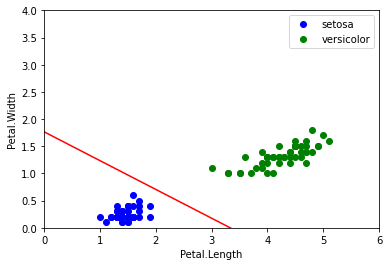

In [5]:
# compute the model in terms that we can plot
slope = - model.coef_[0][0]/model.coef_[0][1]
offset = - model.intercept_[0]/model.coef_[0][1]

# scatter plot of the data
plt.plot(model_df['Petal.Length'][model_df.Species == 'setosa'],
         model_df['Petal.Width'][model_df.Species == 'setosa'],
         'bo')
plt.plot(model_df['Petal.Length'][model_df.Species == 'versicolor'],
         model_df['Petal.Width'][model_df.Species == 'versicolor'],
         'go')
plt.axis([0, 6, 0, 4])
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend(['setosa','versicolor'])

# plot the model
x_ticks = [0,6]
y_ticks = [slope * i + offset for i in x_ticks]
plt.plot(x_ticks,y_ticks,"r-")
plt.show()

As expected, we see that the model perfectly separates the two classes.

# Regression

In regression problem we try to model continuous values rather than classifying a set of discrete values.

## Linear Regression

In linear regression we try to fit a line through (x,y) data.  This line becomes an estimator that, given an x value, will estimate the corresponding y value.

Here is an example which given the speed of a car gives the breaking distance.

In [6]:
import matplotlib.pyplot as plt
import pandas

In [7]:
cars_df = pandas.read_csv(home+"cars.csv")
cars_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


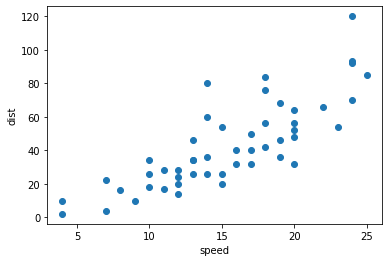

In [8]:
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')
plt.show()

We will model the relationship between speed and distance with a linear model.

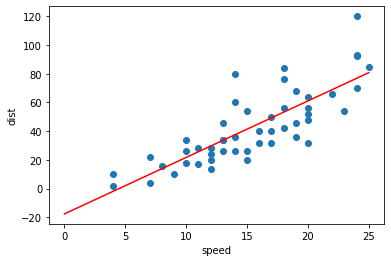

slope: 3.93
intercept: -17.58


In [9]:
# pick model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(cars_df[['speed']].values,cars_df[['dist']])

# plot the model ontop of the data
# plot the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')
# plot the model
x_ticks = [0,25]
y_ticks = [model.coef_[0] * i + model.intercept_ for i in x_ticks]
plt.plot(x_ticks,y_ticks,"r-")
plt.show()

# look at the model parameters
print("slope: {:3.2f}".format(model.coef_[0][0]))
print("intercept: {:3.2f}".format(model.intercept_[0]))

## Regression Model Evaluation

Regression models do not have a notion of **classification accuracy** as we saw with decision trees and perceptrons, but they have an [$R^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination).  Here, the closer to 1.0 the score the better the model. 


In [10]:
# compute the R^2 score 
print("R^2 score: {:3.2f}".format(model.score(cars_df[['speed']].values,cars_df[['dist']])))


R^2 score: 0.65


Not that great.  The low score is mainly due to the fact of the large errors (also called residuals) at the higher end of the speed spectrum.  The problem is that the data probably does not follow a linear relationship between speed and braking distance.  Let's try a different (non-linear) regression model to see if it can pick up this non-linear relationship.

## Non-Linear Regression: Regression Trees

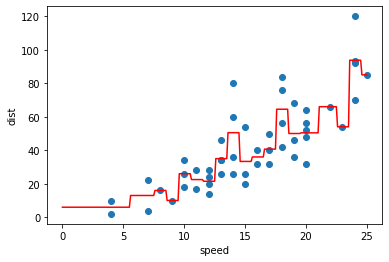

R^2 score: 0.79


In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# get our dataset
cars_df = pd.read_csv(home+"cars.csv")

# pick model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=None)
model.fit(cars_df[['speed']].values,cars_df[['dist']])

# plot the model ontop of the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

# 0 to 25 in .1 increments
x_ticks = pd.DataFrame(list(range(0,251))) / 10.0
y_ticks = pd.DataFrame(model.predict(x_ticks))
plt.plot(list(x_ticks[0]),list(y_ticks[0]),"r-")
plt.show()

# compute the R^2 score 
print("R^2 score: {:3.2f}".format(model.score(cars_df['speed'].values.reshape(-1,1),cars_df['dist'])))

Yes, going to a non-linear regression model certainly improved things.  Although we have to be careful, the reported model performance is likely too optimistic, the model is **overfit**,  because we let the tree model grow without any constraints. We will take a look at this issue once we learn how to evaluate models properly and put some confidence values the obtained results.

# Scikit-Learn Models

Scikit-Learn has a "standardized" view of how to build models and evaluate them:

1. Prepare your data (using Pandas)
  * `pd.read_csv`
  * `df.drop`
  * `df.head`
1. Pick your model and instantiate the model object, e.g.
  * decision trees: `tree.DecisionTreeClassifier(criterion='entropy')`
  * linear models: `LinearRegression(fit_intercept=True)`
1. Fit your model: the `fit` function.
1. Evaluate your model:
  * decision trees: `accuracy_score`
  * linear models ($R^2$-score): `score`

# Models

In machine learning we focus on *model performance* rather than looking at the internal model parameters.

For example, from a machine learning perspective in linear models the most important part is the $R^2$ score, the internal model coefficients are really coincidental and are only used to visualize the model.

We see this approach throughout all of the models we will be looking at.  Furthermore, some machine learning models simply do not have useful model parameters to look at, *e.g.*, neural networks.